In [2]:
import sympy
import matplotlib.pyplot as plt
q = sympy.symbols('x')

In [3]:
x = [-0.9, 0, 0.9, 1.8, 2.7, 3.6]
y = [-0.36892, 0, 0.36892, 0.85408, 1.7856, 6.3138]
k0 = len(x)
k1 = k2 = k3 = k4 = k5 = k6 = k7 = k8 = k9 = k10 = 0

In [4]:
for i in range(k0):
    k1 += x[i]
    k2 += pow(x[i], 2)
    k3 += pow(x[i], 3)
    k4 += pow(x[i], 4)
    k5 += pow(x[i], 5)
    k6 += pow(x[i], 6)
    k7 += y[i]
    k8 += x[i] * y[i]
    k9 += pow(x[i], 2) * y[i]
    k10 += pow(x[i], 3) * y[i]

In [5]:
a = (k0 * k8 - k1 * k7) / (k2 * k0 - k1 * k1);
b = (k7 - k1 * a) / k0;
pol1 = a * q + b
print(pol1)

1.24620825396825*x - 0.190134476190476


In [6]:
a = ((k2 * k9 - k8 * k3) * (k1 * k2 - k0 * k3) - (k9 * k1 - k7 * k3) * (k2 * k2 - k1 * k3)) / ((k4 * k2 - k3 * k3) * (k1 * k2 - k0 * k3) - (k1 * k4 - k2 * k3) * (k2 * k2 - k1 * k3))
c = (a * (k3 * k3 - k4 * k2) + k2 * k9 - k8 * k3) / (k2 * k2 - k1 * k3)
b = (k7 - k0 * c - k2 * a) / k1
pol2 = a * q * q + b * q + c
print(pol2)

0.508086419753087*x**2 - 0.125625079365085*x - 0.464501142857138


In [7]:
res1 = (k6 * k2 - k5 * k3) * (k2 * k0 - k1 * k1) - (k4 * k0 - k3 * k1) * (k4 * k2 - k3 * k3)
res2 = (k5 * k2 - k4 * k3) * (k2 * k0 - k1 * k1) - (k3 * k0 - k2 * k1) * (k4 * k2 - k3 * k3)
res3 = (k10 * k2 - k9 * k3) * (k2 * k0 - k1 * k1) - (k8 * k0 - k7 * k1) * (k4 * k2 - k3 * k3)
res4 = (k5 * k0 - k3 * k2) * (k4 * k1 - k2 * k3) - (k6 * k1 - k4 * k3) * (k3 * k0 - k1 * k2)
res5 = (k4 * k0 - k2 * k2) * (k4 * k1 - k2 * k3) - (k5 * k1 - k3 * k3) * (k3 * k0 - k1 * k2)
res6 = (k9 * k0 - k7 * k2) * (k4 * k1 - k2 * k3) - (k10 * k1 - k8 * k3) * (k3 * k0 - k1 * k2)
a = (res3 * res5 - res6 * res2) / (res1 * res5 - res2 * res4)
b = (res6 - a * res4) / res5
c = ((k9 * k0 - k7 * k2) - a * (k5 * k0 - k3 * k2) - b * (k4 * k0 - k2 * k2)) / (k3 * k0 - k1 * k2)
d = (k10 - k4 * c - k5 * b - k6 * a) / k3
pol3 = a * q * q * q + b * q * q + c * q + d
print(pol3)

0.240991718742063*x**3 - 0.46793004115227*x**2 + 0.20622051734274*x + 0.27336730158731


In [8]:
x_pol = []
y_pol1 = []
y_pol2 = []
y_pol3 = []

In [9]:
for i in range(500):
    x_pol.append(-1.0 + i/100)
    y_pol1.append(pol1.subs(q, x_pol[i]))
    y_pol2.append(pol2.subs(q, x_pol[i]))
    y_pol3.append(pol3.subs(q, x_pol[i]))

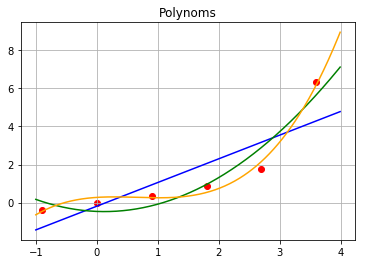

In [10]:
plt.title('Polynoms')
plt.grid(True)
plt.scatter(x, y, color='red')
plt.plot(x_pol, y_pol1, color='blue')
plt.plot(x_pol, y_pol2, color='green')
plt.plot(x_pol, y_pol3, color='orange')
plt.show()

In [11]:
sum1 = sum2 = sum3 = 0
for i in range(k0):
    sum1 += pow(y[i] - pol1.subs(q, x[i]), 2)
    sum2 += pow(y[i] - pol2.subs(q, x[i]), 2)
    sum3 += pow(y[i] - pol3.subs(q, x[i]), 2)
print(sum1, sum2, sum3)

8.67902239536762 2.35574870203429 0.355728876825396


In [12]:
err_pol1 = []
err_pol2 = []
err_pol3 = []
for i in range(k0):
    err_pol1.append(abs(y[i] - pol1.subs(q, x[i])))
    err_pol2.append(abs(y[i] - pol2.subs(q, x[i])))
    err_pol3.append(abs(y[i] - pol3.subs(q, x[i])))
print('  '.join(map(str, err_pol1)))
print('  '.join(map(str, err_pol2)))
print('  '.join(map(str, err_pol3)))

0.942801904761904  0.190134476190476  0.562532952380953  1.19896038095238  1.38902780952381  2.01758476190476
0.429031428571439  0.464501142857138  0.534933714285714  0.101493714285711  1.11466114285714  0.645751428571436
0.0980174603174594  0.273367301587310  0.113294603174599  0.320145396825399  0.376792698412693  0.118702539682534


In [13]:
for i in range(k0):
    print(abs(pol2.subs(q, x[i]) - pol3.subs(q, x[i])))

0.527048888888898
0.737868444444448
0.421639111111115
0.421639111111110
0.737868444444444
0.527048888888902
